<a href="https://colab.research.google.com/github/PreTad/Gallstone-Prediction-and-analysis/blob/main/Gallstone_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# data = pd.read_csv('dataset-uci.xlsx' , engine='openpyxl')
data = pd.read_excel('dataset-uci.xlsx')
(data.head())

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [20]:
data['Gender'].value_counts()

,count
Gender,
0,162
1,157


# Descriptive analysis

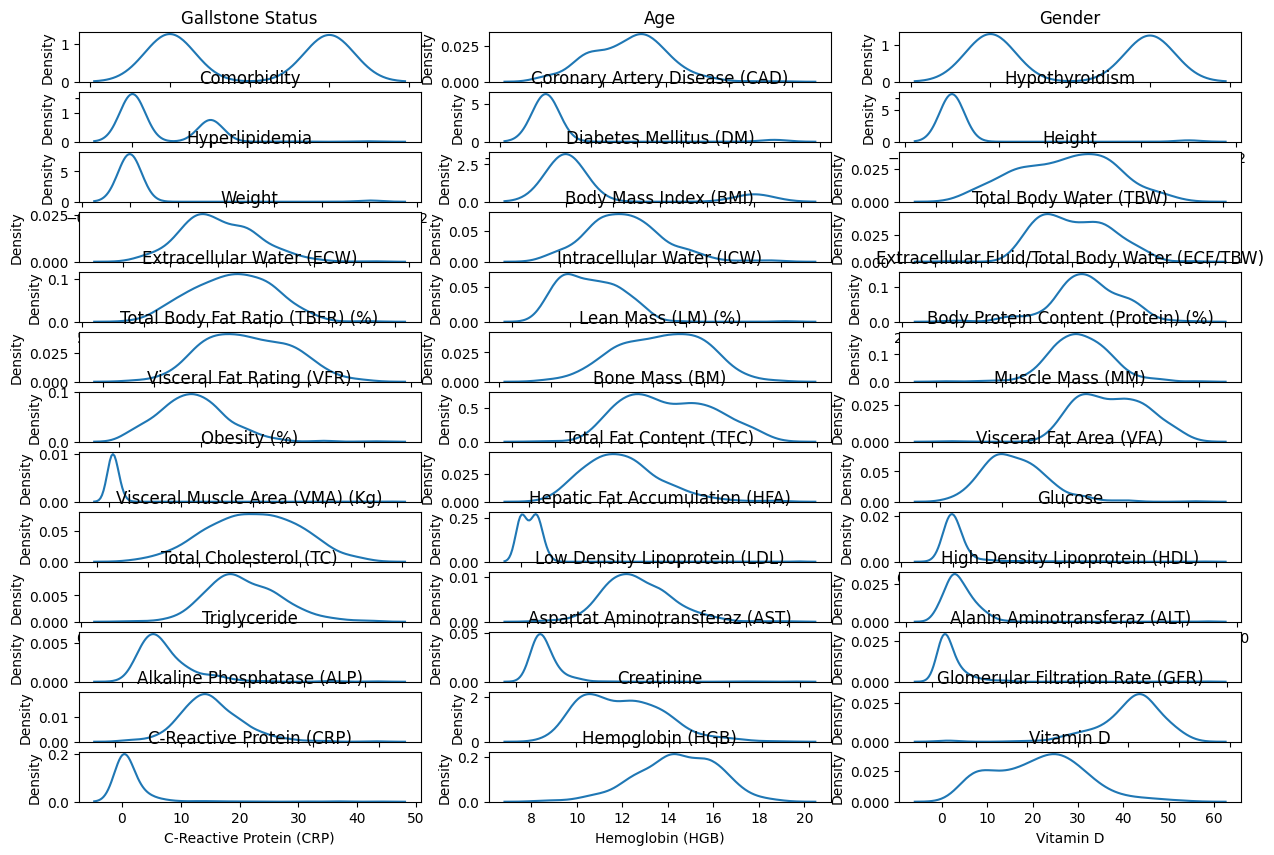

In [21]:
fig, axes = plt.subplots( 13,3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()
# Loop through each column in the DataFrame
for index, column in enumerate(data.columns):
    sns.kdeplot(data[column], ax=axes[index])
    axes[index].set_title(column)  # Set the title for each subplot
    axes[index].set_xlabel(column)  # Set the x-axis label

# Hide any unused subplots if there are more axes than columns


# Adjust layout
plt.tight_layout()
plt.show()

Let's see the effect of obesity and glucose for the cause of Gallstone

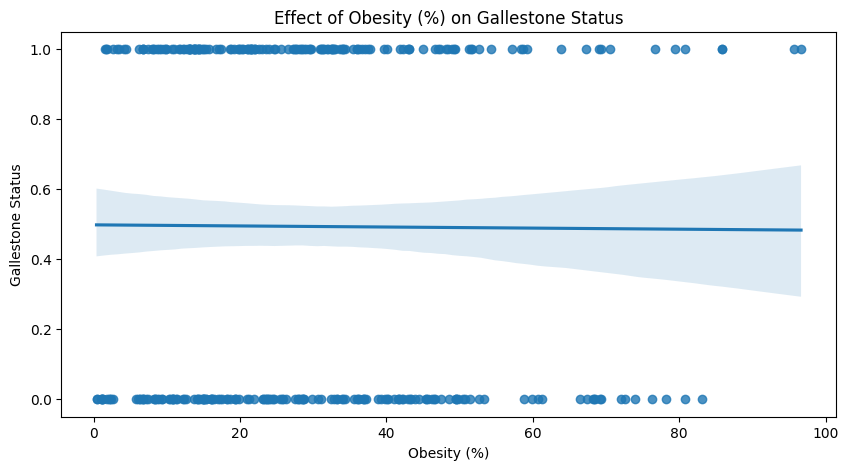

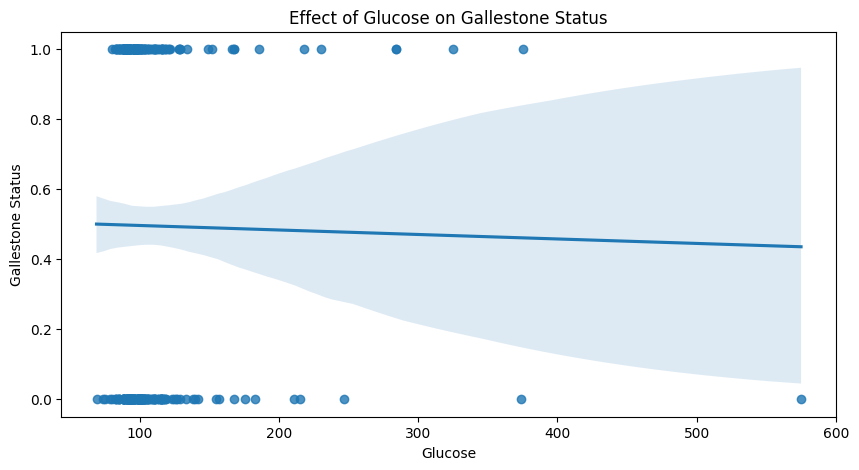

In [52]:
effects_ = ['Obesity (%)','Glucose']

for index,col in enumerate(effects_):
  plt.figure(figsize=[10,5])
  if col == 'Obesity (%)':
    sns.regplot(x=col ,y='Gallstone Status', data=data[data[col] <= 100],logistic=True)
  else:
    sns.regplot(x=col ,y='Gallstone Status', data=data,logistic=True)
  plt.xlabel(col)
  plt.ylabel('Gallestone Status')
  plt.title(f'Effect of {col} on Gallestone Status')
plt.show()

As the graphs shows there is no a significant relationship between the glucose,obesity and gallstone

In [57]:
from scipy import stats

for cols in effects_:
  if col == 'Obesity (%)':
    print(stats.pearsonr(data['Gallstone Status'],data[data[cols] <= 100])[cols])
  else:
    print(stats.pearsonr(data['Gallstone Status'],data[cols]))


PearsonRResult(statistic=np.float64(0.05391995521174331), pvalue=np.float64(0.3370757441054767))
PearsonRResult(statistic=np.float64(-0.011498018333933938), pvalue=np.float64(0.837914522929874))


In [49]:
data[data['Obesity (%)'] > 100].value_counts()

Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  Body Mass Index (BMI)  Total Body Water (TBW)  Extracellular Water (ECW)  Intracellular Water (ICW)  Extracellular Fluid/Total Body Water (ECF/TBW)  Total Body Fat Ratio (TBFR) (%)  Lean Mass (LM) (%)  Body Protein Content (Protein) (%)  Visceral Fat Rating (VFR)  Bone Mass (BM)  Muscle Mass (MM)  Obesity (%)  Total Fat Content (TFC)  Visceral Fat Area (VFA)  Visceral Muscle Area (VMA) (Kg)  Hepatic Fat Accumulation (HFA)  Glucose  Total Cholesterol (TC)  Low Density Lipoprotein (LDL)  High Density Lipoprotein (HDL)  Triglyceride  Aspartat Aminotransferaz (AST)  Alanin Aminotransferaz (ALT)  Alkaline Phosphatase (ALP)  Creatinine  Glomerular Filtration Rate (GFR)  C-Reactive Protein (CRP)  Hemoglobin (HGB)  Vitamin D
0                 57   0       0            0                              0               0               0                       170     143.5   49.7                   66.2                    27.8                       38.4                       42.00                                           42.30                            57.70               7.99                                31                         4.0             78.8              125.6        60.7                     41.00                    35.9                             3.0                             118.0    172.0                   111.0                          46.0                            112.0         32.0                            47.0                          58.0                        0.93        95.77                             0.57                      16.3              26.571429    1
1                 51   1       1            0                              0               0               1                       150     65.9    29.3                   31.9                    13.0                       19.0                       40.75                                           32.63                            67.37               14.80                               7                          2.3             42.1              1954.0       21.5                     9.02                     24.6                             2.0                             186.0    199.0                   118.0                          57.0                            138.0         28.0                            30.0                          65.0                        0.75        96.33                             1.10                      14.3              5.800000     1
                  64   1       0            0                              0               0               0                       150     102.1   45.4                   38.5                    19.2                       19.3                       50.00                                           46.70                            53.28               12.27                               17                         2.8             51.6              106.3        47.7                     18.30                    29.5                             2.0                             109.0    153.0                   85.0                           45.0                            157.0         13.0                            9.0                           90.0                        0.69        96.80                             2.70                      12.0              9.800000     1
Name: count, dtype: int64

In [54]:
# Let's check the normalities of each columns
results = {}
for col in data.columns:
  stat,p_value = stats.shapiro(data[col])
  results[col] = round(p_value,5)

results

{'Gallstone Status': np.float64(0.0),
 'Age': np.float64(0.01534),
 'Gender': np.float64(0.0),
 'Comorbidity': np.float64(0.0),
 'Coronary Artery Disease (CAD)': np.float64(0.0),
 'Hypothyroidism': np.float64(0.0),
 'Hyperlipidemia': np.float64(0.0),
 'Diabetes Mellitus (DM)': np.float64(0.0),
 'Height': np.float64(0.0024),
 'Weight': np.float64(0.00623),
 'Body Mass Index (BMI)': np.float64(1e-05),
 'Total Body Water (TBW)': np.float64(0.00014),
 'Extracellular Water (ECW)': np.float64(0.16919),
 'Intracellular Water (ICW)': np.float64(0.0),
 'Extracellular Fluid/Total Body Water (ECF/TBW)': np.float64(0.0),
 'Total Body Fat Ratio (TBFR) (%)': np.float64(0.04742),
 'Lean Mass (LM) (%)': np.float64(0.07752),
 'Body Protein Content (Protein) (%)': np.float64(0.00029),
 'Visceral Fat Rating (VFR)': np.float64(0.0),
 'Bone Mass (BM)': np.float64(1e-05),
 'Muscle Mass (MM)': np.float64(2e-05),
 'Obesity (%)': np.float64(0.0),
 'Total Fat Content (TFC)': np.float64(0.0),
 'Visceral Fat Area

In [23]:
# Now the average results of some lab tests for Gallstone vs Non Gallstone
data.groupby('Gallstone Status')[data.columns].mean()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,,,,,,,,,,,,,,,,,,,,,
0,0.0,47.633540,0.416149,0.360248,0.055901,0.037267,0.000000,0.099379,168.229814,79.808696,...,46.695652,149.424783,23.913043,28.012422,70.484472,0.823696,101.293545,0.462174,14.763975,24.904969
1,1.0,48.512658,0.569620,0.310127,0.018987,0.018987,0.050633,0.170886,166.063291,81.335443,...,52.308228,139.486076,19.414557,25.677215,75.790506,0.777089,100.335249,3.271962,14.065823,17.831329


# 🔎 Now let's predict the Gallestone status


In [24]:
# Classify the dataset into train,test and validate data first

train ,test ,validate = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

In [25]:
# Check if the the selected samples are balanced
print(len(train[train['Gallstone Status'] == 0]))
print(len(train[train['Gallstone Status'] == 1]))

88
103


it is an almost equal selection so i am going to ignore balance them

In [26]:
Y = train['Gallstone Status']
X = train.drop('Gallstone Status',axis=1)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)
pred_ = knn.predict(test.drop('Gallstone Status',axis=1))
print("Accuracy score: " , accuracy_score(test['Gallstone Status'],pred_))

Accuracy score:  0.515625


In [28]:
# So i'm gonna use validate
x_validate = validate.drop('Gallstone Status',axis=1)
y_validate = validate['Gallstone Status']
knn.fit(x_validate,y_validate)
pred_validate = knn.predict(x_validate)
print(accuracy_score(y_validate,pred_validate))
print(classification_report(y_validate,pred_validate))

0.71875
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        39
           1       0.71      0.48      0.57        25

    accuracy                           0.72        64
   macro avg       0.71      0.68      0.68        64
weighted avg       0.72      0.72      0.71        64



# Use Logistic regression since the accuracy score is too low

In [29]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X,Y)
lr_pred = lr_model.predict(test.drop('Gallstone Status',axis=1))
print(accuracy_score(test['Gallstone Status'],lr_pred))
print(classification_report(test['Gallstone Status'],lr_pred))

0.671875
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        34
           1       0.65      0.67      0.66        30

    accuracy                           0.67        64
   macro avg       0.67      0.67      0.67        64
weighted avg       0.67      0.67      0.67        64



Logistic Regression performs better than KNN

In [30]:
# Now let's validate it
print("The accuracy is: ", accuracy_score(y_validate,lr_pred))
print(classification_report(y_validate,lr_pred))

The accuracy is:  0.5625
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        39
           1       0.45      0.56      0.50        25

    accuracy                           0.56        64
   macro avg       0.56      0.56      0.56        64
weighted avg       0.58      0.56      0.57        64



It is very low


In [31]:
def validation(row_num):
  print(row_num)
  return lr_model.predict(x_validate.iloc[[row_num]]), y_validate.iloc[row_num]

In [38]:
import random
predicted, original = validation(random.randint(0,len(y_validate)))
print(predicted,original)

60
[1] 1
